In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import os
PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
print(PROJ_ROOT)

/home/neha/Desktop/code/ML/Kaggle/googleanalytics


In [2]:
train = pd.read_csv('../data/processed/train_v2_flat.csv',dtype={'fullVisitorId': 'str'})
test = pd.read_csv('../data/processed/test_v2_flat.csv', dtype={'fullVisitorId': 'str'})

/home/neha/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708337 entries, 0 to 1708336
Data columns (total 58 columns):
channelGrouping                                      object
date                                                 int64
fullVisitorId                                        object
socialEngagementType                                 object
visitId                                              int64
visitNumber                                          int64
visitStartTime                                       int64
device_browser                                       object
device_browserSize                                   object
device_browserVersion                                object
device_deviceCategory                                object
device_flashVersion                                  object
device_isMobile                                      bool
device_language                                      object
device_mobileDeviceBranding                          

In [4]:
train.shape

(1708337, 58)

In [5]:
test.shape

(401589, 57)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401589 entries, 0 to 401588
Data columns (total 57 columns):
channelGrouping                                      401589 non-null object
date                                                 401589 non-null int64
fullVisitorId                                        401589 non-null object
socialEngagementType                                 401589 non-null object
visitId                                              401589 non-null int64
visitNumber                                          401589 non-null int64
visitStartTime                                       401589 non-null int64
device_browser                                       401589 non-null object
device_browserSize                                   401589 non-null object
device_browserVersion                                401589 non-null object
device_deviceCategory                                401589 non-null object
device_flashVersion                                  4015

### Columns that are not in test set

In [11]:
set(train.columns) - set(test.columns)

{'trafficSource_campaignCode'}

### Unique users

In [12]:
train.fullVisitorId.nunique()

1323730

In [9]:
test.fullVisitorId.nunique()

296530

In [13]:
# common people between train and test
len(set(train.fullVisitorId.unique()).intersection(set(test.fullVisitorId.unique())))

2759

In [14]:
set(train.fullVisitorId.unique()).intersection(set(test.fullVisitorId.unique()))

{'6102926053899300106',
 '1229664103886064121',
 '1957354636937337349',
 '0702507989054313082',
 '7612862811249200785',
 '7252396449587432952',
 '416544518938245037',
 '6797072971296919265',
 '5709049025613495338',
 '5431062266361073366',
 '0639962709413052407',
 '4260059203069180269',
 '8787172463573882843',
 '723410415798019081',
 '6543625945085582722',
 '2718428152843749527',
 '0711485186723232571',
 '1123644564316438122',
 '0981639881295617469',
 '1745913313684193244',
 '1208225045502736496',
 '4056656103626824559',
 '0184677094981598765',
 '458641016286897597',
 '4029867554065790893',
 '1025864358428862894',
 '9033740841955768512',
 '0972946916171336957',
 '764027601874916510',
 '0169626845268060201',
 '2182485871419939727',
 '6088455341176212717',
 '0217949888455618597',
 '0183292709334415390',
 '5520227457683368964',
 '8424253656260137080',
 '4175607981360174454',
 '1626631661261534888',
 '5009262802164839084',
 '6017034478389797749',
 '7543106868356982377',
 '466917421958046818

In [15]:
train[train.fullVisitorId == '6102926053899300106']

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserSize,device_browserVersion,...,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_campaignCode,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
788794,Affiliates,20171004,6102926053899300106,Not Socially Engaged,1507115301,1,1507115301,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,Data Share Promo,NaN,NaN,NaN,affiliate,NaN,Partners
1479864,Referral,20180315,6102926053899300106,Not Socially Engaged,1521111168,2,1521111168,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,NaN,referral,/analytics/web/,analytics.google.com


In [16]:
test[test.fullVisitorId == '6102926053899300106']

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserSize,device_browserVersion,...,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
77675,Referral,20180909,6102926053899300106,Not Socially Engaged,1536551149,5,1536551149,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),True,(not set),referral,/analytics/app/,analytics.google.com
123553,Referral,20180808,6102926053899300106,Not Socially Engaged,1533789546,4,1533789546,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not set),referral,/analytics/app/,analytics.google.com
124977,Affiliates,20180808,6102926053899300106,Not Socially Engaged,1533782419,3,1533782419,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,Data Share Promo,NaN,(not set),affiliate,(not set),Partners
371800,Referral,20181002,6102926053899300106,Not Socially Engaged,1538527582,6,1538527582,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),True,(not set),referral,/analytics/app/,analytics.google.com
373392,Referral,20181002,6102926053899300106,Not Socially Engaged,1538529527,7,1538529527,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),True,(not set),referral,/analytics/app/,analytics.google.com


### Target variable 

In [18]:
train["totals_transactionRevenue"] = train["totals_transactionRevenue"].astype('float')
train[train['totals_transactionRevenue'] > 0.0].shape[0]/train.shape[0]

0.010837440153786987

In [20]:
train[train['totals_transactionRevenue'] > 0.0].shape[0]

18514

In [21]:
train[train['totals_transactionRevenue'] > 0.0].fullVisitorId.nunique()/train.fullVisitorId.nunique()

0.012193574218307359

In [22]:
train[train['totals_transactionRevenue'] > 0.0].fullVisitorId.nunique()

16141

In [23]:
train['totals_transactionRevenue'].describe()

count    1.851400e+04
mean     1.251132e+08
std      4.162653e+08
min      1.000000e+04
25%      2.306750e+07
50%      4.606000e+07
75%      1.000000e+08
max      2.312950e+10
Name: totals_transactionRevenue, dtype: float64

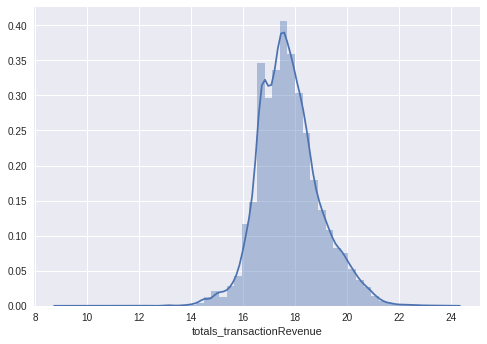

In [24]:
sns.distplot(np.log(train[~train['totals_transactionRevenue'].isnull()]['totals_transactionRevenue']))

In [25]:
train['totals_transactionRevenue'].quantile(0.75)

100000000.0

In [26]:
train['totals_transactionRevenue'].quantile(0.95)

463183999.99999905

### columns with only one unique value

In [27]:
const_cols = [c for c in train.columns if train[c].nunique(dropna=False)==1 ]
const_cols

['socialEngagementType',
 'device_browserSize',
 'device_browserVersion',
 'device_flashVersion',
 'device_language',
 'device_mobileDeviceBranding',
 'device_mobileDeviceInfo',
 'device_mobileDeviceMarketingName',
 'device_mobileDeviceModel',
 'device_mobileInputSelector',
 'device_operatingSystemVersion',
 'device_screenColors',
 'device_screenResolution',
 'geoNetwork_cityId',
 'geoNetwork_latitude',
 'geoNetwork_longitude',
 'geoNetwork_networkLocation',
 'totals_visits',
 'trafficSource_adwordsClickInfo.criteriaParameters']

In [28]:
len(const_cols)

19

In [29]:
train['device_mobileDeviceModel'].unique()

array(['not available in demo dataset'], dtype=object)

In [30]:
train['geoNetwork_cityId'].unique()

array(['not available in demo dataset'], dtype=object)

In [26]:
train.nunique(dropna=False)

channelGrouping                                           8
date                                                    366
fullVisitorId                                        714167
sessionId                                            902755
socialEngagementType                                      1
visitId                                              886303
visitNumber                                             384
visitStartTime                                       887159
device.browser                                           54
device.browserSize                                        1
device.browserVersion                                     1
device.deviceCategory                                     3
device.flashVersion                                       1
device.isMobile                                           2
device.language                                           1
device.mobileDeviceBranding                               1
device.mobileDeviceInfo                 

In [32]:
train.columns[train.nunique(dropna=False) > 1]

Index(['channelGrouping', 'date', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'device_browser', 'device_deviceCategory',
       'device_isMobile', 'device_operatingSystem', 'geoNetwork_city',
       'geoNetwork_continent', 'geoNetwork_country', 'geoNetwork_metro',
       'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'totals_bounces', 'totals_hits',
       'totals_newVisits', 'totals_pageviews', 'totals_sessionQualityDim',
       'totals_timeOnSite', 'totals_totalTransactionRevenue',
       'totals_transactionRevenue', 'totals_transactions',
       'trafficSource_adContent',
       'trafficSource_adwordsClickInfo.adNetworkType',
       'trafficSource_adwordsClickInfo.gclId',
       'trafficSource_adwordsClickInfo.isVideoAd',
       'trafficSource_adwordsClickInfo.page',
       'trafficSource_adwordsClickInfo.slot', 'trafficSource_campaign',
       'trafficSource_campaignCode', 'trafficSource_isTrueDirect',
       'trafficSourc

In [33]:
len(train.columns[train.nunique(dropna=False) > 1])

39

In [34]:
len(train.columns)

58

In [35]:
train.channelGrouping.value_counts()

Organic Search    738963
Social            354971
Direct            273134
Referral          211307
Display            51283
Paid Search        45627
Affiliates         32915
(Other)              137
Name: channelGrouping, dtype: int64

/home/neha/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


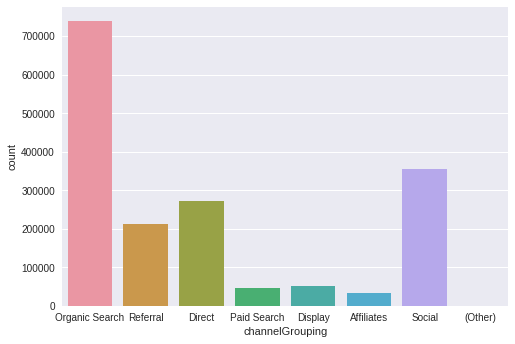

In [36]:
sns.countplot(train.channelGrouping)

/home/neha/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


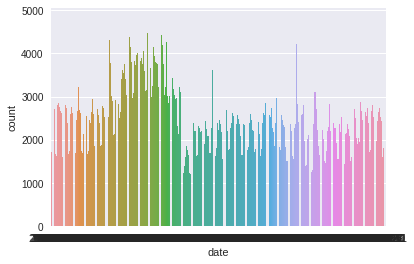

In [33]:
sns.countplot(train.date)

In [37]:
train.date.min()

20160801

In [38]:
train.date.max()

20180430

In [39]:
test.date.min()

20180501

In [40]:
test.date.max()

20181015

In [39]:
# train data is from 1st Aug 2016 - 30 Apr 2018
# test data is from 1st may 2018 - 15 Oct 2018

/home/neha/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


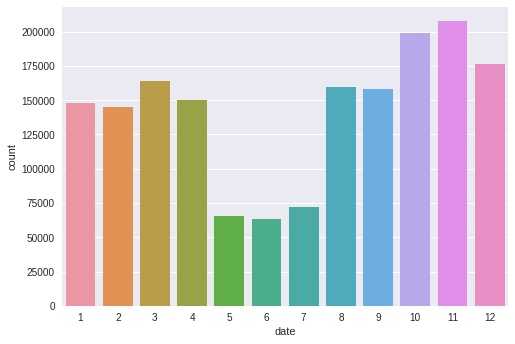

In [41]:
sns.countplot(train.date.apply(lambda x: (x%10000)//100))

/home/neha/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


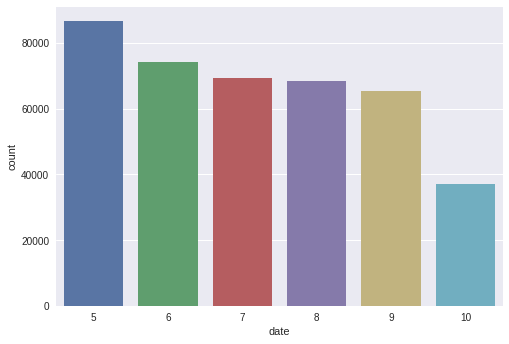

In [42]:
sns.countplot(test.date.apply(lambda x: (x%10000)//100))

In [47]:
train.shape[0]

1708337

In [48]:
train.columns[train.nunique(dropna=False) > 1]

Index(['channelGrouping', 'date', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'device_browser', 'device_deviceCategory',
       'device_isMobile', 'device_operatingSystem', 'geoNetwork_city',
       'geoNetwork_continent', 'geoNetwork_country', 'geoNetwork_metro',
       'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'totals_bounces', 'totals_hits',
       'totals_newVisits', 'totals_pageviews', 'totals_sessionQualityDim',
       'totals_timeOnSite', 'totals_totalTransactionRevenue',
       'totals_transactionRevenue', 'totals_transactions',
       'trafficSource_adContent',
       'trafficSource_adwordsClickInfo.adNetworkType',
       'trafficSource_adwordsClickInfo.gclId',
       'trafficSource_adwordsClickInfo.isVideoAd',
       'trafficSource_adwordsClickInfo.page',
       'trafficSource_adwordsClickInfo.slot', 'trafficSource_campaign',
       'trafficSource_campaignCode', 'trafficSource_isTrueDirect',
       'trafficSourc

### HITS EDA

In [58]:
tf = train.groupby(['fullVisitorId', 'visitId']).size().reset_index()
tf.columns = ['fullVisitorId', 'visitId', 'cnt']

In [65]:
tf[tf.cnt > 1]
# there are some duplicates in the combination of fullVisitorId and visitId

,fullVisitorId,visitId,cnt
1786,0011338928267756760,1471848731,2
2401,0014884852016449602,1483257533,2
3174,0019612470994343873,1496731675,2
4018,0024548526285681218,1515396552,2
4618,0028094302211785880,1515743688,2
5184,0031542961723593073,1495261490,2
6458,0039798900163330977,1485331011,2
7330,0044595854962267172,1519804267,2
7812,0047064119019485310,1480924286,2
8209,0049220146968431383,1472626229,2


In [67]:
train[train.fullVisitorId == '9993252474620509752']

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserSize,device_browserVersion,...,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_campaignCode,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
826957,Direct,20180208,9993252474620509752,Not Socially Engaged,1518161654,1,1518161654,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,NaN,(none),NaN,(direct)
1700900,Direct,20180209,9993252474620509752,Not Socially Engaged,1518161654,1,1518163355,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,NaN,(none),NaN,(direct)


In [71]:
train.visitNumber.value_counts()

1      1307430
2       182542
3        70962
4        37886
5        23314
6        15702
7        11194
8         8338
9         6350
10        5018
11        4007
12        3283
13        2729
14        2311
15        1981
16        1737
17        1512
18        1346
19        1195
20        1073
21         955
22         866
23         766
24         716
25         661
26         603
27         549
28         506
29         466
30         436
        ...   
332          1
394          1
368          1
367          1
366          1
365          1
347          1
348          1
352          1
393          1
395          1
415          1
407          1
414          1
413          1
412          1
411          1
410          1
409          1
408          1
406          1
398          1
405          1
404          1
351          1
402          1
401          1
456          1
399          1
457          1
Name: visitNumber, Length: 457, dtype: int64

### Target variable EDA

In [86]:
# relation between visit number and transaction values
vt1 = train[train['totals_transactionRevenue'] > 0.0].groupby('visitNumber').size().reset_index().rename(columns={0:'cnt'})
vt2 = train.groupby('visitNumber').size().reset_index().rename(columns={0:'cntall'})

vt = pd.merge(vt2, vt1, on='visitNumber', how='left')
vt.fillna(0, inplace=True)

In [93]:
vt['percent'] = vt['cnt']/vt['cntall']

In [94]:
vt[['visitNumber', 'percent']]

,visitNumber,percent
0,1,0.005572
1,2,0.021650
2,3,0.031566
3,4,0.037428
4,5,0.038174
5,6,0.038912
6,7,0.037252
7,8,0.035260
8,9,0.036693
9,10,0.037465


/home/neha/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


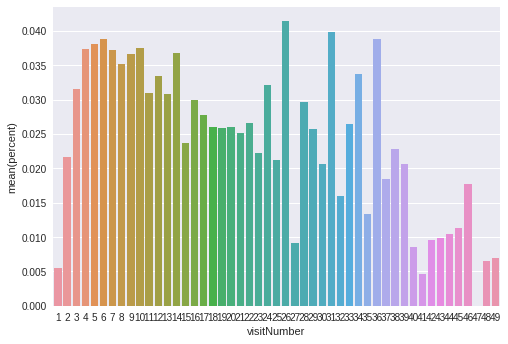

In [97]:
sns.barplot(x='visitNumber', y='percent', data=vt[vt.visitNumber < 50])

### device EDA

In [108]:
#'device_browser', 'device_deviceCategory', 'device_isMobile', 'device_operatingSystem'

In [103]:
sum(train.device_browser.isnull())

0

In [104]:
train.device_browser.value_counts()

Chrome                                                  1173056
Safari                                                   312165
Firefox                                                   63845
Internet Explorer                                         35474
Android Webview                                           34266
Edge                                                      20543
Samsung Internet                                          15792
Opera Mini                                                15018
Safari (in-app)                                           14207
Opera                                                      9585
UC Browser                                                 5313
YaBrowser                                                  3045
Amazon Silk                                                1467
Coc Coc                                                    1242
Android Browser                                             941
Mozilla Compatible Agent                

In [106]:
train.device_deviceCategory.isnull().sum()

0

In [109]:
train.device_deviceCategory.value_counts()

desktop    1171579
mobile      471336
tablet       65422
Name: device_deviceCategory, dtype: int64

In [111]:
train.device_isMobile.value_counts()

False    1171670
True      536667
Name: device_isMobile, dtype: int64

In [113]:
train.device_operatingSystem.isnull().sum()

0

In [118]:
train.device_operatingSystem.value_counts()

Windows             619720
Macintosh           438514
Android             299386
iOS                 219334
Linux                63971
Chrome OS            51318
(not set)            11815
Windows Phone         1675
Samsung                911
Tizen                  709
BlackBerry             350
OS/2                   199
Xbox                   133
Nintendo Wii           100
Firefox OS              97
Nintendo WiiU           51
FreeBSD                 18
Playstation Vita        15
Nintendo 3DS             9
SunOS                    3
OpenBSD                  3
Nokia                    3
SymbianOS                2
NTT DoCoMo               1
Name: device_operatingSystem, dtype: int64

In [124]:
train.isnull().sum()

channelGrouping                                            0
date                                                       0
fullVisitorId                                              0
socialEngagementType                                       0
visitId                                                    0
visitNumber                                                0
visitStartTime                                             0
device_browser                                             0
device_browserSize                                         0
device_browserVersion                                      0
device_deviceCategory                                      0
device_flashVersion                                        0
device_isMobile                                            0
device_language                                            0
device_mobileDeviceBranding                                0
device_mobileDeviceInfo                                    0
device_mobileDeviceMarke

In [125]:
#'geoNetwork_city',
#       'geoNetwork_continent', 'geoNetwork_country', 'geoNetwork_metro',
#       'geoNetwork_networkDomain', 'geoNetwork_region',
#       'geoNetwork_subContinent'

In [127]:
train.geoNetwork_city.value_counts()

not available in demo dataset    932959
Mountain View                     74110
(not set)                         65867
New York                          49460
San Francisco                     36960
Sunnyvale                         27923
London                            23622
San Jose                          20141
Los Angeles                       17038
Chicago                           15143
Bangkok                           12468
Bengaluru                         11428
Ho Chi Minh City                  10393
Toronto                           10196
Istanbul                           9827
Seattle                            9566
Dublin                             9436
Sydney                             8951
Mumbai                             8563
Hyderabad                          8353
Paris                              8094
Chennai                            8046
Sao Paulo                          7828
Austin                             7289
Hanoi                              6966


In [128]:
train.geoNetwork_continent.value_counts()

Americas     877403
Asia         396719
Europe       368037
Africa        35481
Oceania       28180
(not set)      2517
Name: geoNetwork_continent, dtype: int64

In [129]:
train.geoNetwork_country.value_counts()

United States               717217
India                       105317
United Kingdom               73341
Canada                       51057
Germany                      38516
Japan                        36637
Brazil                       35432
Vietnam                      34869
France                       32289
Thailand                     29859
Turkey                       29166
Taiwan                       26560
Mexico                       25270
Australia                    23660
Spain                        23431
Netherlands                  22146
Italy                        20694
Russia                       19641
Indonesia                    16675
Poland                       15874
Philippines                  14272
Singapore                    13294
Ireland                      12287
South Korea                  11563
Malaysia                     10820
Argentina                    10128
Sweden                        9895
Ukraine                       9859
Romania             

In [130]:
train.geoNetwork_metro.value_counts()

not available in demo dataset         932959
(not set)                             386896
San Francisco-Oakland-San Jose CA     182745
New York NY                            50419
London                                 23643
Los Angeles CA                         19953
Chicago IL                             15300
Seattle-Tacoma WA                      15251
Austin TX                               7289
Washington DC (Hagerstown MD)           7021
Boston MA-Manchester NH                 5868
Dallas-Ft. Worth TX                     5787
Houston TX                              5704
Atlanta GA                              5464
Detroit MI                              4517
JP_KANTO                                4343
San Diego CA                            3484
Philadelphia PA                         2837
Roanoke-Lynchburg VA                    2674
Denver CO                               2572
Pittsburgh PA                           2131
Charlotte NC                            1911
Portland O

In [131]:
train.geoNetwork_networkDomain.value_counts()

(not set)                499049
unknown.unknown          269796
comcast.net               55486
rr.com                    28715
verizon.net               26547
ttnet.com.tr              17078
comcastbusiness.net       16826
hinet.net                 15933
virginm.net               12594
cox.net                   10722
sbcglobal.net             10596
google.com                 9997
prod-infinitum.com.mx      9925
optonline.net              9734
att.net                    9255
btcentralplus.com          9152
rima-tde.net               8078
3bb.co.th                  7832
vnpt.vn                    7662
asianet.co.th              7067
qwest.net                  6945
totbb.net                  6828
telecomitalia.it           6405
t-ipconnect.de             6117
airtelbroadband.in         5991
bell.ca                    5956
pldt.net                   5753
virtua.com.br              5399
bhn.net                    5363
amazonaws.com              5039
                          ...  
odyssey.

In [132]:
train.geoNetwork_region.value_counts()

not available in demo dataset    932959
California                       206669
(not set)                         49774
New York                          49733
England                           25824
Texas                             20480
Washington                        15372
Illinois                          15352
Maharashtra                       13634
Bangkok                           12468
Taipei City                       11901
Ontario                           11655
Karnataka                         11447
Delhi                             11218
Istanbul                           9827
Tamil Nadu                         9395
Ile-de-France                      8962
New South Wales                    8957
Telangana                          8374
County Dublin                      8187
State of Sao Paulo                 7969
Ho Chi Minh                        7250
Hanoi                              7075
Tokyo                              6968
Jakarta                            6431


In [133]:
train.geoNetwork_subContinent.value_counts()

Northern America      768345
Southeast Asia        121634
Southern Asia         121062
Western Europe        115153
Northern Europe       111693
Eastern Asia           91072
South America          75112
Eastern Europe         74007
Southern Europe        67184
Western Asia           60966
Central America        29564
Australasia            27867
Northern Africa        17255
Western Africa          7086
Southern Africa         6019
Caribbean               4382
Eastern Africa          4194
(not set)               2517
Central Asia            1985
Middle Africa            927
Melanesia                133
Micronesian Region       128
Polynesia                 52
Name: geoNetwork_subContinent, dtype: int64

In [134]:
#'totals_bounces', 'totals_hits',
#       'totals_newVisits', 'totals_pageviews', 'totals_sessionQualityDim',
#       'totals_timeOnSite', 'totals_totalTransactionRevenue',
#       'totals_transactionRevenue', 'totals_transactions',

In [135]:
train.totals_bounces.value_counts()

1.0    871578
Name: totals_bounces, dtype: int64

In [136]:
train.totals_hits.value_counts()

1      864064
2      237499
3      134435
4       80875
5       63687
6       46598
7       38137
8       29717
9       24999
10      20306
11      17506
12      14877
13      13033
14      11361
15      10017
16       8818
17       7682
18       6924
19       6149
20       5643
21       4938
22       4543
23       4056
24       3746
25       3400
26       3100
27       2698
28       2549
29       2317
30       2257
        ...  
233         1
228         1
183         1
217         1
216         1
186         1
212         1
210         1
204         1
202         1
241         1
244         1
291         1
245         1
283         1
282         1
281         1
280         1
278         1
276         1
273         1
265         1
260         1
259         1
252         1
251         1
250         1
249         1
246         1
221         1
Name: totals_hits, Length: 297, dtype: int64

In [137]:
train.totals_newVisits.value_counts()

1.0    1307430
Name: totals_newVisits, dtype: int64

In [138]:
train.shape[0]

1708337

In [139]:
train.totals_pageviews.value_counts()

1.0      876328
2.0      249794
3.0      142896
4.0       86666
5.0       64712
6.0       47721
7.0       37751
8.0       29586
9.0       24153
10.0      19228
11.0      16510
12.0      13414
13.0      11543
14.0       9946
15.0       8512
16.0       7273
17.0       6399
18.0       5611
19.0       4798
20.0       4209
21.0       3855
22.0       3447
23.0       2964
24.0       2680
25.0       2385
26.0       2239
27.0       1903
28.0       1832
29.0       1484
30.0       1435
          ...  
194.0         1
166.0         1
159.0         1
168.0         1
171.0         1
173.0         1
174.0         1
155.0         1
154.0         1
186.0         1
151.0         1
189.0         1
190.0         1
191.0         1
195.0         1
230.0         1
196.0         1
197.0         1
198.0         1
200.0         1
201.0         1
142.0         1
210.0         1
213.0         1
215.0         1
219.0         1
220.0         1
223.0         1
162.0         1
500.0         1
Name: totals_pageviews, 

In [140]:
train.totals_sessionQualityDim.value_counts()

1.0      717560
2.0       52517
3.0       17066
4.0        9552
5.0        6743
6.0        5086
7.0        3976
8.0        3337
9.0        2729
10.0       2382
11.0       2070
12.0       1803
13.0       1589
14.0       1412
15.0       1312
16.0       1221
17.0       1063
19.0       1024
18.0        995
21.0        960
20.0        950
22.0        944
23.0        879
26.0        851
25.0        816
24.0        769
27.0        766
28.0        754
31.0        733
29.0        713
          ...  
80.0        489
69.0        488
76.0        486
74.0        485
75.0        485
73.0        481
58.0        475
77.0        472
79.0        465
53.0        461
81.0        451
83.0        445
82.0        416
84.0        399
85.0        367
86.0        327
87.0        298
88.0        258
89.0        192
90.0        182
91.0        160
92.0        127
94.0        112
93.0        102
95.0         94
96.0         52
97.0         27
98.0          9
99.0          5
100.0         2
Name: totals_sessionQual

In [141]:
train.totals_timeOnSite.value_counts()

5.0        9862
4.0        9738
6.0        9150
7.0        8221
8.0        8123
10.0       8117
9.0        8114
11.0       7975
12.0       7935
51.0       7771
13.0       7628
14.0       7599
15.0       7297
50.0       7280
17.0       7244
16.0       7198
52.0       7104
19.0       6898
18.0       6857
20.0       6707
21.0       6561
23.0       6508
22.0       6421
24.0       6319
3.0        6302
28.0       6080
53.0       6060
26.0       6031
25.0       5999
27.0       5904
           ... 
4177.0        1
4179.0        1
4181.0        1
4185.0        1
4189.0        1
4196.0        1
19017.0       1
4200.0        1
4202.0        1
4203.0        1
4205.0        1
4212.0        1
4216.0        1
4217.0        1
4222.0        1
4225.0        1
4227.0        1
4229.0        1
4231.0        1
4232.0        1
4233.0        1
4237.0        1
4239.0        1
4242.0        1
4245.0        1
4247.0        1
4250.0        1
4252.0        1
4253.0        1
8187.0        1
Name: totals_timeOnSite,

In [142]:
train.totals_transactions.value_counts()

1.0     18048
2.0       420
3.0        43
4.0        17
5.0        11
6.0         6
7.0         5
8.0         3
12.0        2
25.0        1
21.0        1
15.0        1
10.0        1
Name: totals_transactions, dtype: int64

In [145]:
# people visiting second time
sum(train.groupby('fullVisitorId').size()  > 1)

185681

In [146]:
# percentage of people revisting the store
sum(train.groupby('fullVisitorId').size()  > 1)/train.fullVisitorId.nunique()

0.1402710522538584

In [143]:
#'trafficSource_adContent',
#       'trafficSource_adwordsClickInfo.adNetworkType',
#       'trafficSource_adwordsClickInfo.gclId',
#       'trafficSource_adwordsClickInfo.isVideoAd',
#       'trafficSource_adwordsClickInfo.page',
#       'trafficSource_adwordsClickInfo.slot', 'trafficSource_campaign',
#       'trafficSource_campaignCode', 'trafficSource_isTrueDirect',
#       'trafficSource_keyword', 'trafficSource_medium',
#       'trafficSource_referralPath', 'trafficSource_source'

In [147]:
train.trafficSource_adContent.value_counts()

Google Merchandise Store                       39566
Google Merchandise Collection                   6762
Placement Accessores 300 x 250                  3040
Smart display ad - 8/17/2017                    2664
Display Ad created 3/11/14                      2344
Google Online Store                             1773
Official Google Merchandise                      866
Ad from 12/15/17                                 853
Full auto ad IMAGE ONLY                          822
Placement Drinkware 300x250                      653
Ad from 12/13/16                                 610
Ad from 11/3/16                                  489
{KeyWord:Google Brand Items}                     418
Display Ad created 3/11/15                       392
Placement Accessories 336 x 280                  308
BQ                                               287
Placement Accessories 300 x 250                  280
{KeyWord:Google Merchandise}                     274
Placement Accessories 160 x 600               

In [150]:
train['trafficSource_adwordsClickInfo.adNetworkType'].value_counts()

Content            42223
Google Search      33043
Search partners        8
Name: trafficSource_adwordsClickInfo.adNetworkType, dtype: int64

In [151]:
train['trafficSource_adwordsClickInfo.gclId'].value_counts()

CN_Whvvc_9UCFd6LswodGTgKCQ                                                                      74
Cj0KEQjwmIrJBRCRmJ_x7KDo-9oBEiQAuUPKMufMpuG3ZdwYO8GTsjiBFd5MPHStZa9y_9NCrI8X97oaAglc8P8HAQ      70
COT1-vPT4tYCFZWNswodcwsHxg                                                                      60
CN3fusbjvtYCFQsmhgodIEQO-g                                                                      51
CI2Ap4L32tYCFY-1wAodeHEHPA                                                                      41
Cj0KEQjw1ee_BRD3hK6x993YzeoBEiQA5RH_BEA562M9tvl_mtnAFvtDnDqOQRp1RvxMMgwjcX1LAfwaAj4o8P8HAQ      41
CPSo2PeD3tYCFYk_GwodJrEEUg                                                                      38
CKKrvpbe2dYCFdYSaAodSHAOGw                                                                      37
CP273vOzr9YCFQEHaQoduBgHSA                                                                      35
CMa4z8jL29YCFdmIswodNRAHRg                                                                      35
CKvL9K7o-t

In [152]:
train['trafficSource_adwordsClickInfo.isVideoAd'].value_counts()

False    75274
Name: trafficSource_adwordsClickInfo.isVideoAd, dtype: int64

In [153]:
train['trafficSource_adwordsClickInfo.isVideoAd'].isnull().sum()

1633063

In [154]:
train['trafficSource_adwordsClickInfo.page'].value_counts()

1.0     73913
2.0      1057
3.0       172
4.0        80
5.0        30
6.0        10
7.0         6
9.0         3
14.0        1
12.0        1
8.0         1
Name: trafficSource_adwordsClickInfo.page, dtype: int64

In [155]:
train['trafficSource_adwordsClickInfo.slot'].value_counts()

RHS                       42750
Top                       32447
Google Display Network       77
Name: trafficSource_adwordsClickInfo.slot, dtype: int64

In [156]:
train['trafficSource_campaign'].value_counts()

(not set)                                                               1604526
Data Share Promo                                                          32914
1000557 | GA | US | en | Hybrid | GDN Text+Banner | AS                    24410
1000557 | GA | US | en | Hybrid | GDN Remarketing                         15149
AW - Dynamic Search Ads Whole Site                                        15146
AW - Accessories                                                           7972
Smart Display Campaign                                                     2664
"google + redesign/Accessories March 17" All Users Similar Audiences       1179
Page: contains "/google+redesign/drinkware" Similar Audiences               611
"google + redesign/Accessories March 17" All Users                          562
Sports & Fitness/Health & Fitness Buffs                                     463
Run of Network Line Item                                                    428
Media & Entertainment/Movie Lovers      

In [157]:
train['trafficSource_campaignCode'].value_counts()

11251kjhkvahf    1
Name: trafficSource_campaignCode, dtype: int64

In [158]:
#'trafficSource_isTrueDirect',
#       'trafficSource_keyword', 'trafficSource_medium',
#       'trafficSource_referralPath', 'trafficSource_source'

In [159]:
train.trafficSource_isTrueDirect.value_counts()

True    534518
Name: trafficSource_isTrueDirect, dtype: int64

In [160]:
train.trafficSource_keyword.value_counts()

(not provided)                                                                         568933
(User vertical targeting)                                                               25918
(automatic matching)                                                                    18464
6qEhsCssdK0z36ri                                                                        10870
(Remarketing/Content targeting)                                                          5826
1hZbAqLCbjwfgOH7                                                                         2990
google merchandise store                                                                 2612
Google Merchandise                                                                       1879
1X4Me6ZKNV0zg-jV                                                                         1277
google store                                                                             1148
DoubleClick Ad Exchange                                     

In [161]:
train.trafficSource_medium.value_counts()

organic      591783
(none)       565957
referral     432963
cpc           75603
affiliate     32915
cpm            8982
(not set)       134
Name: trafficSource_medium, dtype: int64

In [162]:
train.trafficSource_referralPath.value_counts()

/                                                                                                                                                                         138293
/yt/about/                                                                                                                                                                 79163
/analytics/web/                                                                                                                                                            33112
/yt/about/tr/                                                                                                                                                              14600
/yt/about/vi/                                                                                                                                                              13753
/yt/about/es-419/                                                                                                  

In [163]:
train.trafficSource_source.value_counts()

google                         658384
(direct)                       565975
youtube.com                    329450
analytics.google.com            37436
Partners                        32931
sites.google.com                 9072
google.com                       8341
m.facebook.com                   6737
dfa                              6704
baidu                            4971
reddit.com                       4092
facebook.com                     3584
googleads.g.doubleclick.net      3539
qiita.com                        3394
bing                             3368
quora.com                        3032
mail.google.com                  2558
yahoo                            2436
siliconvalley.about.com          2097
groups.google.com                2009
t.co                             2005
l.facebook.com                   1529
blog.golang.org                  1382
dealspotr.com                     750
support.google.com                676
productforums.google.com          672
plus.google.

### check how many of repeat clients had bought anything in the first visit

In [165]:
sum(train.groupby('fullVisitorId').size()  > 1)

185681

In [166]:
train.date.head()

0    20171016
1    20171016
2    20171016
3    20171016
4    20171016
Name: date, dtype: int64

In [171]:
re_visit = train.groupby('fullVisitorId').size().reset_index().rename(columns={0:'visit_num'})
re_visit = re_visit[re_visit.visit_num > 1]

In [172]:
re_visit.head()

,fullVisitorId,visit_num
0,0000000259678714014,2
5,0000040862739425590,2
6,0000049363351866189,3
9,0000059488412965267,3
24,0000174067426171406,2


In [183]:
train.loc[train.fullVisitorId.isin(['0000000259678714014','0000040862739425590', '0000049363351866189','0000059488412965267', '0000174067426171406']), ['fullVisitorId','visitId', 'visitNumber','channelGrouping', 'date', 'totals_transactionRevenue']].sort_values('fullVisitorId')

,fullVisitorId,visitId,visitNumber,channelGrouping,date,totals_transactionRevenue
680923,0000000259678714014,1511914780,2,Organic Search,20171128,NaN
683687,0000000259678714014,1511912001,1,Organic Search,20171128,NaN
1260285,0000040862739425590,1486836571,1,Paid Search,20170211,NaN
1260399,0000040862739425590,1486838824,2,Paid Search,20170211,NaN
673988,0000049363351866189,1505779414,1,Direct,20170918,NaN
674984,0000049363351866189,1505796426,2,Direct,20170918,NaN
1361332,0000049363351866189,1505863874,3,Direct,20170919,NaN
76445,0000059488412965267,1519200377,1,Direct,20180221,NaN
575259,0000059488412965267,1519787699,3,Direct,20180227,NaN
575355,0000059488412965267,1519772893,2,Direct,20180227,NaN


In [184]:
re_visit.shape[0]

185681

In [185]:
re_visit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185681 entries, 0 to 1323727
Data columns (total 2 columns):
fullVisitorId    185681 non-null object
visit_num        185681 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.2+ MB


In [187]:
train[(train.fullVisitorId.isin(re_visit.fullVisitorId)) & (train.totals_transactionRevenue > 0)].fullVisitorId.nunique()

11226

In [188]:
train[(train.fullVisitorId.isin(re_visit.fullVisitorId)) & (train.totals_transactionRevenue > 0)].fullVisitorId.head()

433    9549826748224805897
550    3700714855829972615
555    1572225825161580042
597    7187192533100162289
634    1061090985384136368
Name: fullVisitorId, dtype: object

In [190]:
train.loc[train.fullVisitorId.isin(['9549826748224805897', '3700714855829972615', '1572225825161580042', '7187192533100162289', '1061090985384136368']), ['fullVisitorId','visitId', 'visitNumber','channelGrouping', 'date', 'totals_transactionRevenue']].sort_values('fullVisitorId')

,fullVisitorId,visitId,visitNumber,channelGrouping,date,totals_transactionRevenue
576515,1061090985384136368,1519768400,10,Referral,20180227,NaN
1343349,1061090985384136368,1521760969,11,Referral,20180322,NaN
1216566,1061090985384136368,1509999802,8,Referral,20171106,NaN
1190372,1061090985384136368,1507917189,1,Referral,20171013,NaN
1183593,1061090985384136368,1513557377,9,Referral,20171217,19980000.0
595943,1061090985384136368,1509059342,4,Referral,20171026,NaN
634,1061090985384136368,1508175834,2,Referral,20171016,44000000.0
595854,1061090985384136368,1509077323,5,Referral,20171026,33200000.0
967742,1061090985384136368,1509120014,6,Referral,20171027,NaN
966773,1061090985384136368,1509142014,7,Referral,20171027,NaN


In [191]:
train[(train.fullVisitorId.isin(re_visit.fullVisitorId)) & (train.totals_transactionRevenue > 0)].visitNumber.value_counts()

2      3806
1      2629
3      2179
4      1400
5       875
6       606
7       413
8       292
9       231
10      186
11      124
12      109
14       85
13       83
16       52
15       46
17       42
18       35
19       31
20       28
26       25
21       24
22       23
24       23
23       17
31       16
28       15
25       14
29       12
36       11
       ... 
118       1
246       1
334       1
430       1
103       1
63        1
71        1
119       1
396       1
300       1
87        1
67        1
75        1
83        1
91        1
99        1
115       1
123       1
131       1
259       1
172       1
299       1
315       1
327       1
76        1
84        1
92        1
108       1
116       1
359       1
Name: visitNumber, Length: 126, dtype: int64

In [192]:
train.date.head()

0    20171016
1    20171016
2    20171016
3    20171016
4    20171016
Name: date, dtype: int64

In [193]:
train.visitStartTime.head()

0    1508198450
1    1508176307
2    1508201613
3    1508169851
4    1508190552
Name: visitStartTime, dtype: int64

In [197]:
pd.to_datetime(train['date'], format='%Y%m%d').head()

0   2017-10-16
1   2017-10-16
2   2017-10-16
3   2017-10-16
4   2017-10-16
Name: date, dtype: datetime64[ns]